<Step1. 탐색> : 데이터의 기초 정보 살펴보기

Chipotle 데이터셋의 기본 정보

In [32]:
import pandas as pd 

# read_csv 함수로 데이터를 Dataframe 형태로 불러옵니다.
file_path="C:/Users/USER/Desktop/01-15/chipotle.tsv"

#sep='\t'는 탭('\t')을 구분자로 사용하여 데이터를 읽어오라는 것을 나타냅니다. 만약 데이터가 탭으로 구분되어 있다면 이 설정이 필요합니다.
chipo=pd.read_csv(file_path, sep='\t')

In [33]:
print(chipo.shape)
print('-'*50)
print(chipo.info())

(4622, 5)
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


    
Chipotle 데이터셋의 행과 열, 데이터

In [34]:
# chipo 라는 Dataframe에서 순서대로 10개의 row 데이터를 보여줍니다.
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [35]:
print(chipo.columns)
print('-'*50)
print(chipo.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
--------------------------------------------------
RangeIndex(start=0, stop=4622, step=1)


Chipotle 데이터셋의 수치적 특징 파악

In [36]:
#describe 함수로 요약 통계량 출력하기

# order_id는 숫자의 의미를 가지지 않기 때문에 str으로 변환
chipo['order_id']=chipo['order_id'].astype(str)

In [37]:
#수치형 피처들의 요약 통계량을 확인
print(chipo.describe())

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


In [38]:
#unique 함수로 범주형 피처의 개수 출력하기
print(len(chipo['order_id'].unique()))
print(len(chipo['item_name'].unique()))

1834
50


<Step2. 인사이트의 발견> : 탐색과 시각화

가장 많이 주문한 item

In [39]:
#가장 많이 주문한item top10
item_count = chipo['item_name'].value_counts()[:10]
for idx, (val, cnt) in enumerate(item_count.items(), 1):
    print("Top", idx, ":", val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


In [40]:
chipo['item_name'].value_counts().index.tolist()[0]

'Chicken Bowl'

item당 주문 개수와 총량 구하기

In [41]:
#item당 주문 개수 출력
order_count=chipo.groupby('item_name')['order_id'].count()
order_count[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [42]:
#item당 주문 총량 출력
item_quantity=chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

시각화로 분석 결과 살펴보기

In [43]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt

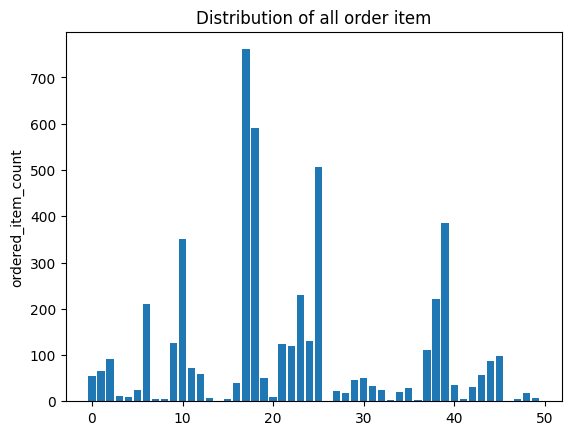

In [44]:
item_name_list=item_quantity.index.tolist()
x_pos=np.arange(len(item_name_list))
order_cnt=item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all order item')

plt.show()



<Step3. 데이터 전처리> : 나만의 조력자를 정의하자

apply와 lambda 함수를 이용한 데이터 전처리

In [45]:
print(chipo.info())
print('-'*50)
chipo['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None
--------------------------------------------------


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [46]:
# column 단위 데이터에 apply 함수로 전처리 적용
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
#x[1:]는 각 문자열의 첫 번째 문자(달러 기호)를 제외한 나머지 문자열을 선택 후, float() 함수를 사용하여 해당 문자열을 부동소수점형으로 변환
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


In [47]:
chipo['item_price'].head()

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

<Step4. 탐색적 분석> : 스무고개로 분석하는 개념적 탐색

주문당 평균 계산금액 출력하기

In [48]:
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428568

In [49]:
chipo.groupby('order_id')['item_price'].sum().describe()[:10]

count    1834.000000
mean       18.811429
std        11.652512
min        10.080000
25%        12.572500
50%        16.200000
75%        21.960000
max       205.250000
Name: item_price, dtype: float64

한 주문에 10달러 이상 사용한 주문 번호(id) 출력하기

In [50]:
chipo_orderid_group = chipo.groupby('order_id').sum()
results = chipo_orderid_group[chipo_orderid_group.item_price >= 10] #'item_price' 열이 10 이상인 주문만을 필터링

print(results[:10])
print(results.index.values)

          quantity                                          item_name  \
order_id                                                                
1                4  Chips and Fresh Tomato SalsaIzzeNantucket Nect...   
10               2                    Chicken BowlChips and Guacamole   
100              2                           Steak BurritoCanned Soda   
1000             2                          Barbacoa BowlChicken Bowl   
1001             2                           Steak BurritoCanned Soda   
1002             2                      Barbacoa BurritoSide of Chips   
1003             2                  Carnitas BurritoCanned Soft Drink   
1004             2                                       Chicken Bowl   
1005             3              Chicken BurritoChipsCanned Soft Drink   
1006             8  Chicken Soft TacosVeggie BowlSteak BowlChicken...   

                                         choice_description  item_price  
order_id                                         

각 아이템의 가격 구하기

In [51]:
chipo_one_item = chipo[chipo.quantity == 1] #주문량 1인 제품만 필터링
price_per_item = chipo_one_item.groupby('item_name').min() #제품명을 기준으로 그룹화, 최소값 선택
price_per_item.sort_values(by = "item_price", ascending = False)[:10] #item_price열을 기준으로 내람차순, 가장높은 상위 가격 10개 선택

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


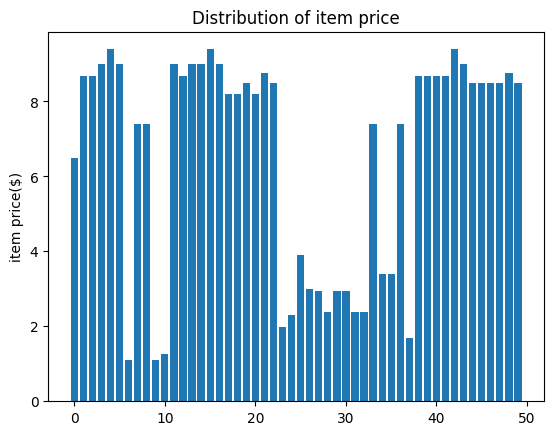

In [52]:
# 아이템 가격 분포 그래프를 출력합니다.
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].tolist()
 
plt.bar(x_pos, item_price, align='center')
plt.ylabel('item price($)')
plt.title('Distribution of item price')
 
plt.show()

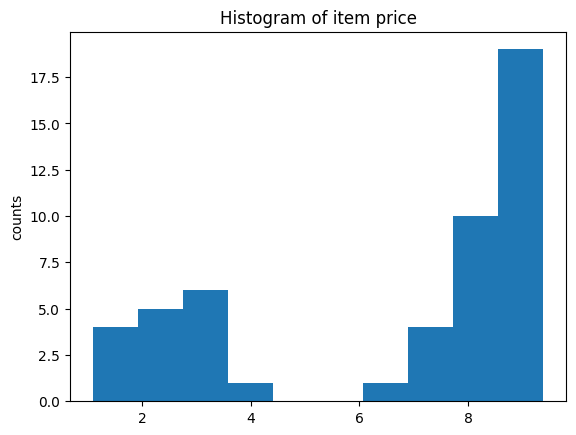

In [53]:
#아이템 가격 히스토그램

plt.hist(item_price)
plt.ylabel('counts')
plt.title('Histogram of item price')

plt.show()


가장 비싼 주문에서 item이 총 몇개 팔렸는지 구하기

In [54]:
chipo.groupby('order_id').sum().sort_values(by='item_price', ascending=False)

,quantity,item_name,choice_description,item_price
order_id,,,,
926,23,Steak BurritoChicken BowlChicken BowlChicken B...,"[Fresh Tomato Salsa, [Rice, Sour Cream, Lettuc...",205.25
1443,35,Chips and Fresh Tomato SalsaBottled Water6 Pac...,"[Coke][Fresh Tomato Salsa, [Fajita Vegetables,...",160.74
1483,14,Chicken BowlSteak BowlChicken BurritoSteak Bow...,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",139.00
691,11,Chicken BurritoChicken Salad BowlSteak Burrito...,"[Tomatillo Red Chili Salsa, [Rice, Cheese, Sou...",118.25
1786,20,Chicken BowlCarnitas BurritoChicken BowlChicke...,"[Fresh Tomato Salsa, Rice][Fresh Tomato Salsa,...",114.30
...,...,...,...,...
1014,2,Steak BurritoCanned Soda,"[Fresh Tomato Salsa (Mild), [Cheese, Rice, Pin...",10.08
730,2,Barbacoa BowlCanned Soda,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.08
14,2,Carnitas BurritoCanned Soda,"[[Tomatillo-Green Chili Salsa (Medium), Roaste...",10.08


“Veggie Salad Bowl”이 몇 번 주문되었는지 구하기

In [55]:
chipo_salad=chipo[chipo['item_name']=='Veggie Salad Bowl']
#drop_duplicates함수로 한 주문 내에서 중복 집계된 item_name제거
chipo_salad=chipo_salad.drop_duplicates(['item_name','order_id'])

print(len(chipo_salad))
chipo_salad.head()

18


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


“Chicken Bowl”을 2개 이상 주문한 주문 횟수 구하기

In [56]:
# Chicken Bowl 아이템에 대한 조건 필터링
chipo_chicken = chipo[chipo['item_name'] == 'Chicken Bowl']

# quantity가 2 이상인 행 필터링
chipo_chicken_result = chipo_chicken[chipo_chicken['quantity'] >= 2]

# 결과 출력
print(len(chipo_chicken_result))


33


In [58]:
# “Chicken Bowl”을 2개 이상 주문한 고객들의 "Chicken Bowl" 메뉴의 총 주문 수량을 구합니다.

chipo_chicken = chipo[chipo['item_name'] == "Chicken Bowl"]
chipo_chicken_ordersum = chipo_chicken.groupby('order_id').sum()['quantity']
chipo_chicken_result = chipo_chicken_ordersum[chipo_chicken_ordersum >= 2]

print(len(chipo_chicken_result))
chipo_chicken_result.head(5)

114


order_id
1004    2
1023    2
1072    2
1078    2
1091    2
Name: quantity, dtype: int64